# **Task 1 : Prediction using Supervised ML**
# **Notebook by Mandy D'mello**


In this task, we will predict the percentage of marks that a student is expected to score based on the number of hours they study.                                                                      
We will predict what the score of a student will be if they study for 9.25hrs/day.                                                                                               
This is a simple linear regression task as it involves two variables.                                                                                       
                                                            The dataset used for this can be found at - http://bit.ly/w-data

## **Step 1 : Importing the libraries**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## **Step 2 : Loading the dataset**

In [2]:
# Loading the data from the remote link
df = pd.read_csv('http://bit.ly/w-data')


## **Step 3 : Data Understanding**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## **Step 4 : Data Visualization**

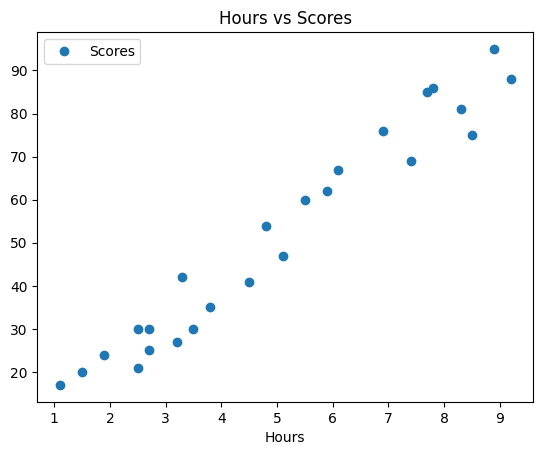

In [9]:
# Plotting the distribution of scores by hours of studies
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.show()

The above scatter plot illustrates a positive linear relationship between the number of hours studied and the scores achieved. As the number of hours increases, the scores also increase.

## **Step 5 : Preparing the data**
* Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## **Step 6 : Algorithm Training**
* Splitting the data into Training data set and Test data
set.
* Start training the algorithm.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

## **Step 7 : Plotting the line of regression**

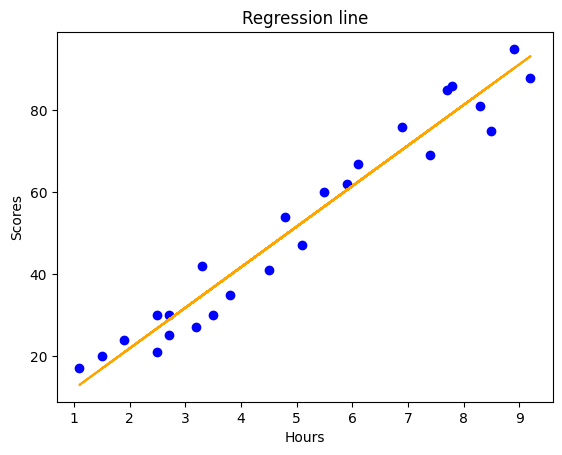

In [25]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter (x,y,color = 'Blue')
plt.plot (x, line, color = 'orange')
plt.title("Regression line")
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

In the above scatter plot, the blue dots represent the actual scores, wheareas the orange line represents the predictions made by the model. The close alignment between the actual data points and the regression line confirms the model's effectiveness.

## **Step 8 : Making Predictions**


In [26]:
# Testing data - In Hours
print(x_test)

# Predicting the scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## **Step 9 : Comparing Actual Scores and Predicted Scores**

In [27]:
# Comparing Actual Scores vs Predicted Scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [19]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
# Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))

Training score: 0.9515510725211552
Testing score: 0.9454906892105354


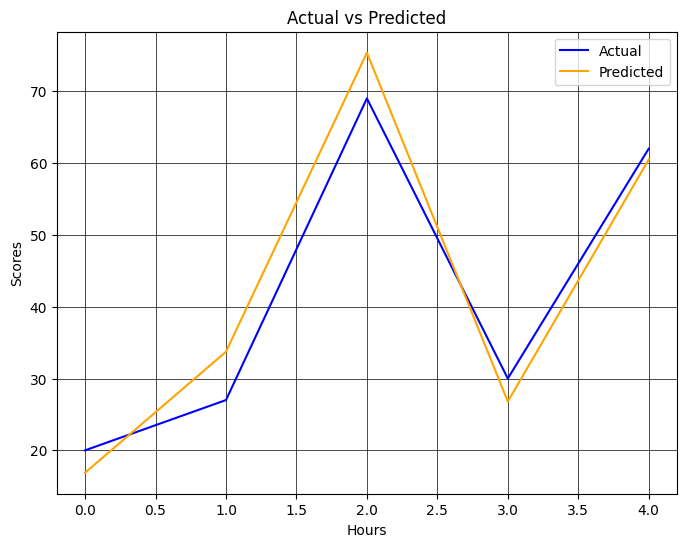

In [29]:
# Ploting the line graph to depict the diffrence between the actual and predicted scores.
df.plot(kind='line', figsize=(8,6),color=['blue','orange'])
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='major', linewidth='0.5', color='black')
plt.title("Actual vs Predicted")
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

In [30]:
# Testing our own data.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


## **The predicted score for a student who studies 9.25 hours/day is approximately 93.69**


## **Step 10 : Evaluating the model**
In the final step we are evaluating the performance of algorithm. This step is to compare how well different algorithms perform on a particular dataset.

In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root mean squared Error: 4.647447612100373
